In [1]:
%display latex

In [2]:
var('r T', domain='real')

(r, T)

In [3]:
zp(r,T) = sqrt((e^(r/2)-T^2)/(e^(r/2)*(r/2-1)+T^2))
zp

(r, T) |--> sqrt(2)*sqrt(-(T^2 - e^(1/2*r))/(2*T^2 + (r - 2)*e^(1/2*r)))

In [4]:
z = integrate(zp(r,T), r)
z

sqrt(2)*integrate(sqrt(-(T^2 - e^(1/2*r))/(2*T^2 + (r - 2)*e^(1/2*r))), r)

In [6]:
zp2 = zp(r,1/2).simplify_full()
zp2

sqrt((4*e^(1/2*r) - 1)/(2*(r - 2)*e^(1/2*r) + 1))

In [7]:
integrate(zp2,r)

integrate(sqrt((4*e^(1/2*r) - 1)/(2*(r - 2)*e^(1/2*r) + 1)), r)

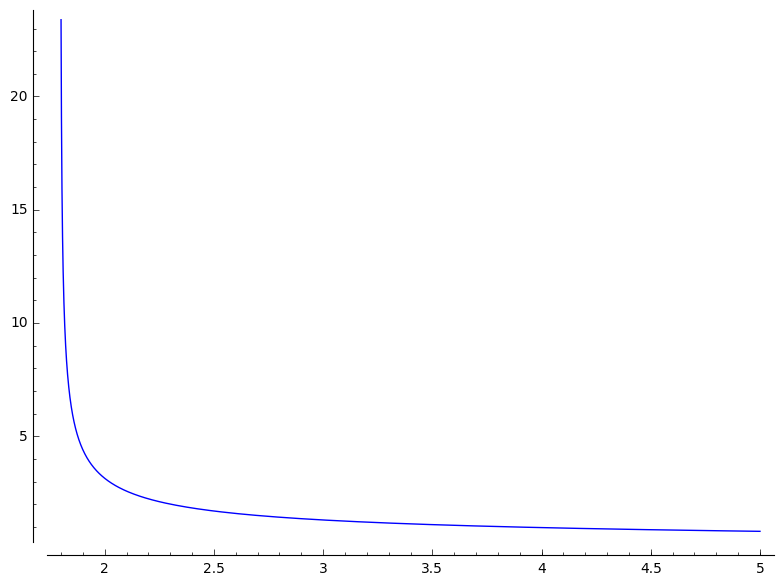

In [9]:
plot(zp2, (r, 1.8, 5))

In [10]:
rmin(T) = 2*(lambert_w(-T^2/RDF(e)) + 1)

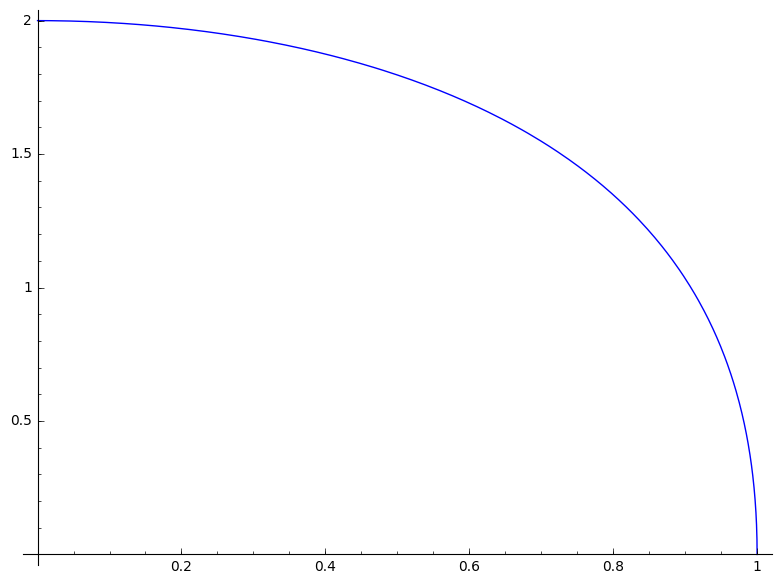

In [11]:
plot(rmin(T), (T,0,1))

In [24]:
numerical_integral?

In [17]:
rmin(1/2)

1.796343137811716

In [20]:
numerical_integral(zp2, rmin(1/2), 4, algorithm='qags')

(4.226847171414384, 6.199106712401203e-07)

In [21]:
numerical_integral(zp2, rmin(1/2), 4)

(4.22684713221003, 3.9444870252143814e-06)

In [22]:
def zz(r1, T0):
    dzdr = zp(r, T0)
    numint = numerical_integral(dzdr, rmin(T0), r1, algorithm='qags')
    error = numint[1]
    if error > 1e-3: 
        print("Warning: error = {}".format(error))
    return numint[0]

In [23]:
zz(4, 1/2)

4.226847171414399

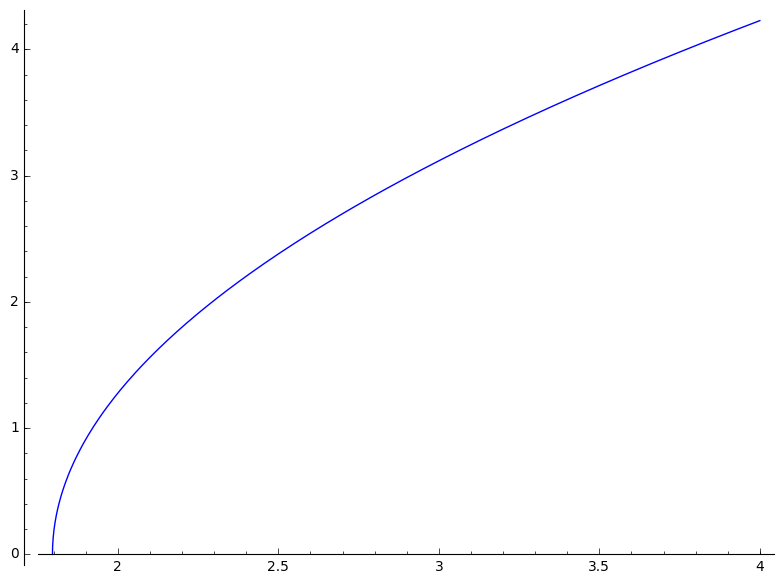

In [25]:
plot(lambda r: zz(r, 1/2), rmin(1/2), 4)

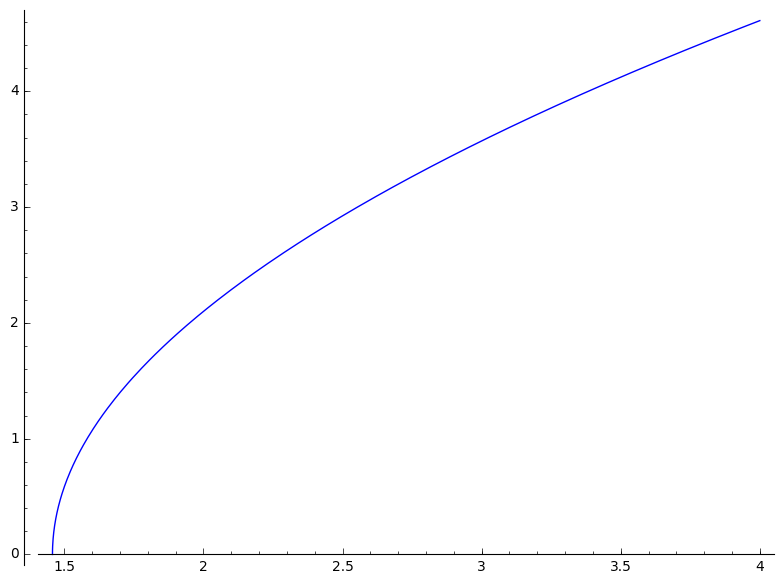

In [26]:
plot(lambda r: zz(r, 3/4), rmin(3/4), 4)

In [45]:
T0_list = [0, 0.98, 0.99, 0.999, 0.99999]
g = Graphics()
for T0 in T0_list:
    g += plot(lambda r: zz(r, T0), rmin(T0), 50)

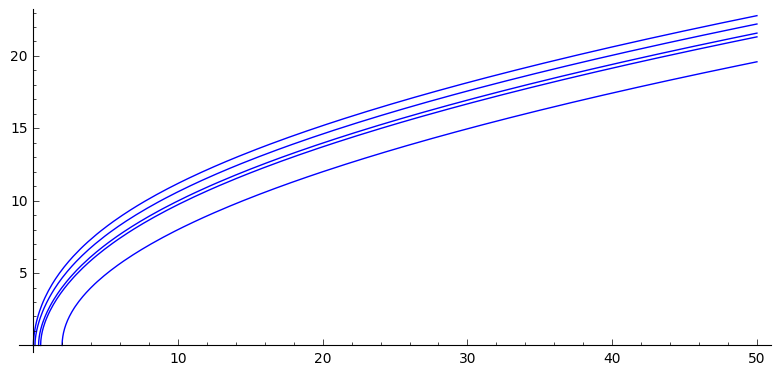

In [46]:
show(g, aspect_ratio=1, xmin=0, xmax=50)

In [49]:
parametric_plot3d?

In [51]:
var('ph', latex_name=r'\phi', domain='real')

ph

In [61]:
parametric_plot3d?

In [75]:
from sage.manifolds.utilities import set_axes_labels

In [83]:
T0 = 0
g1 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), lambda r,ph: zz(r, T0)], 
                      (rmin(T0), 8), (0, 2*pi), color='red')
g2 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), lambda r,ph: -zz(r, T0)], 
                      (rmin(T0), 8), (0, 2*pi), color='red')
g = set_axes_labels(g1 + g2, 'x', 'y', 'z')
show(g, aspect_ratio=1)

Graphics3d Object

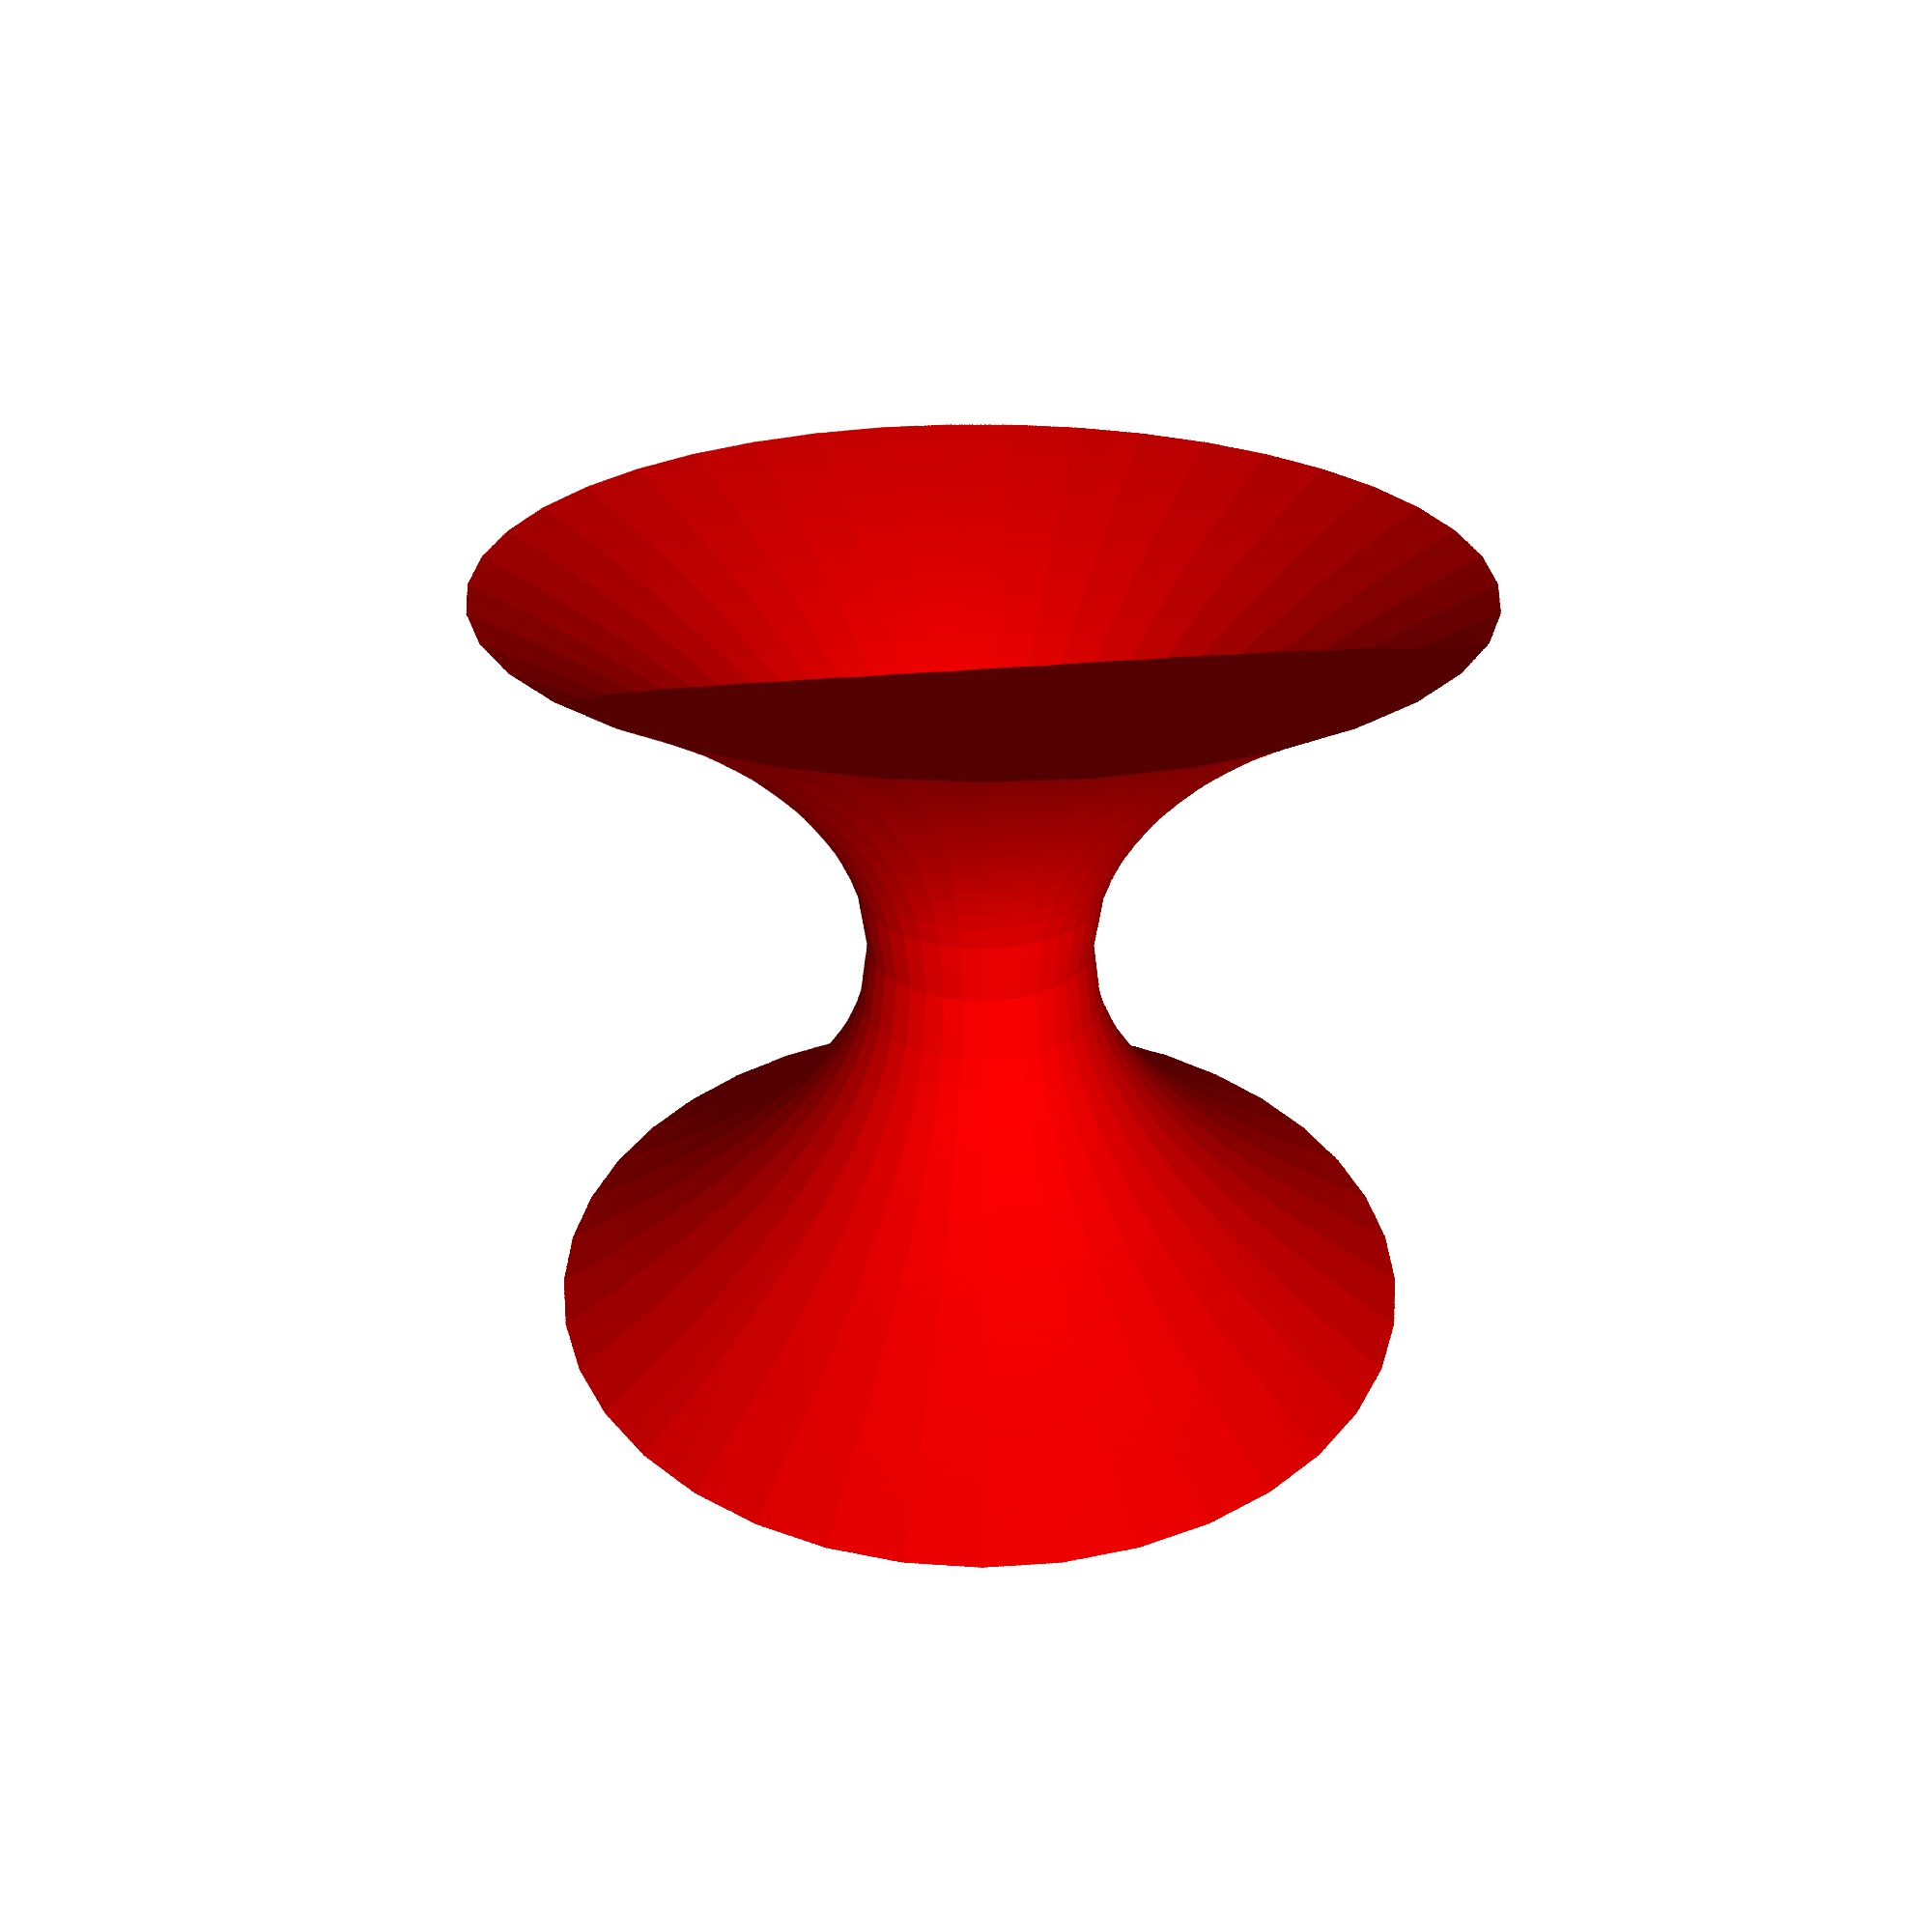

In [90]:
show(g, aspect_ratio=1, viewer='tachyon', frame=False, figsize=20)

In [88]:
g.save('max_flamm_paraboloid.png', aspect_ratio=1)

In [80]:
T0 = 0.99999
g1 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), lambda r,ph: zz(r, T0)], 
                      (rmin(T0), 8), (0, 2*pi), color='red')
g2 = parametric_plot3d([lambda r,ph: r*cos(ph), lambda r,ph: r*sin(ph), lambda r,ph: -zz(r, T0)], 
                      (rmin(T0), 8), (0, 2*pi), color='red')
g = set_axes_labels(g1 + g2, 'x', 'y', 'z')
show(g, aspect_ratio=1)

Graphics3d Object

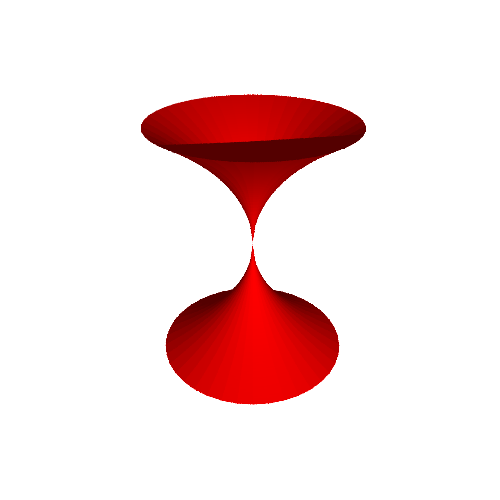

In [79]:
show(g, aspect_ratio=1, viewer='tachyon', frame=False)